## Final Project Submission

Please fill out:
* Student name: Eleanor Kelman
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### <font color = '#044cb3'>The datasets I will be analyzing comes from a CSV file from the National Transportation Safety Board. It comprises civil aviation accident records from 1962-2023.

In [7]:
# import dataset

df = pd.read_csv('data/Aviation_Data.csv', dtype = {'Event.Id' : str})

In [8]:
df.head(3)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007


In [9]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

### <font color = '#044cb3'>The columns listed in plain English:

- event ID
- investigation type
- accident number
- event date
- location
- country
- latitude
- longitude
- airport code
- airport name
- injury severity
- aircraft damage
- aircraft category
- registration number
- make
- model
- amateur-built
- number of engines
- engine type
- FAR description
- schedule
- purpose of flight
- air carrier
- total fatal injuries
- total serious injuries
- total minor injuries
- total uninjured
- weather condition
- broad phase of flight
- report status
- publication date

<br />

<br />

### <font color = '#044cb3'> To start our analysis, let's examine the relationship between amateur and professional aircraft when accounting for very severe crashes (crashes including fatalities).

In [10]:
# check injury severity levels of all crashes

df['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(78)         1
Fatal(135)        1
Fatal(169)        1
Fatal(114)        1
Fatal(35)         1
Name: Injury.Severity, Length: 109, dtype: int64

### <font color = '#044cb3'>Looking at the injury severities, there appear to be a lot of names to mean the same thing (for example, the values of *Fatal*, *Fatal(1)*, and *Fatal(228)* all refer to deadly crashes). Let's start by cleaning up this data so that there are only a few specific injury types.

In [19]:
# clean up list of fatal crashes to retrieve all rows

# compile list of rows containing string "Fatal"
fatal_rows = ['Fatal']

unique_values = set(list(df['Injury.Severity']))

for value in unique_values:
    if type(value) == str:
        if value != 'Non-Fatal' and 'Fatal' in value:
            fatal_rows.append(value)

# apply change to column      
df['Injury.Severity'] = df['Injury.Severity'].apply(lambda value: "Fatal" if value in fatal_rows else value)

In [12]:
df['Injury.Severity'].value_counts()

Non-Fatal      67357
Fatal          17826
Incident        2219
Minor            218
Serious          173
Unavailable       96
Name: Injury.Severity, dtype: int64

In [13]:
# separate amateur and professional builds

df_amateur = df[df['Amateur.Built'] == 'No']

df_prof = df[df['Amateur.Built'] == 'Yes']

In [14]:
# sum amateur and professional builds

total_amateur = df_amateur['Event.Id'].count()

total_prof = df_prof['Event.Id'].count()

### <font color = '#044cb3'>Now let's tally up the amateur fatal incidents in comparison to the professional fatal incidents.

In [15]:
total_amateur_fatal = df_amateur[df_amateur['Injury.Severity'] == 'Fatal']['Event.Id'].count()

total_prof_fatal = df_prof[df_prof['Injury.Severity'] == 'Fatal']['Event.Id'].count()

In [16]:
print(f"The total number of fatal crashes that involve amateur craft is {total_amateur_fatal}.")

print("")

print(f"The total number of fatal crashes that involve professional craft is {total_prof_fatal}.")

The total number of fatal crashes that involve amateur craft is 15436.

The total number of fatal crashes that involve professional craft is 2357.


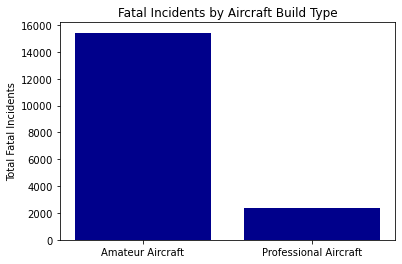

In [17]:
fig, ax = plt.subplots()

ax.bar("Amateur Aircraft", total_amateur_fatal, color = 'darkblue')

ax.bar("Professional Aircraft", total_prof_fatal, color = 'darkblue')

ax.set_title("Fatal Incidents by Aircraft Build Type")
ax.set_ylabel("Total Fatal Incidents")

plt.show()

### <font color = '#044cb3'>To conclude, there are far, far more fatal incidents involving amateur aircraft than professional aircraft, likely due to the lack of extreme oversight that goes into professional flights, such as rigorous pilot training and extensive flight and ground crews.

### <font color = '#044cb3'>In order to have safer, less fatal flights, a recommendation would be to utilize professional crafts and all the additional benefits that come with these, such as ground crews and dual-pilot crews.

<br />

<br />

### <font color = '#044cb3'>As a final conclusion, let us examine the number of incidents based on the weather conditions behind flights.

In [18]:
df['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

### <font color = '#044cb3'>To summarize these, VMC means Visual Meterological Conditions, or conditions in which it is deemed safe to fly by sight alone. IMC refers to Instrument Meterological Conditions, in which instruments should be used to assist in flight (visibility is reduced). UNK and Unk both refer to unknown conditions.

### <font color = '#044cb3'>To start cleaning the data, we should combine the final two conditions, as they refer to the same thing (unknown weather condition data).

In [21]:
# apply change to column

df['Weather.Condition'] = df['Weather.Condition'].apply(lambda value : 'UNK' if value == 'UNK' or value == 'Unk' else value)

In [22]:
# tally number of each weather condition (including unknown)

total_vmc = df['Weather.Condition'].value_counts()['VMC']

total_imc = df['Weather.Condition'].value_counts()['IMC']

total_unk = df['Weather.Condition'].value_counts()['UNK']

In [25]:
print(f"The total number of crashes under VMC is {total_vmc}.")

print("")

print(f"The total number of crashes under IMC is {total_imc}.")

print("")

print(f"The total number of crashes under unknown conditions is {total_unk}.")

The total number of crashes under VMC is 77303.

The total number of crashes under IMC is 5976.

The total number of crashes under unknown conditions is 1118.


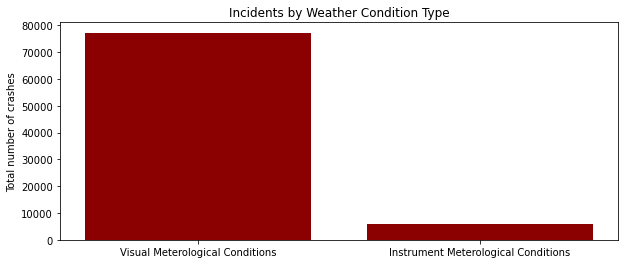

In [31]:
fig, ax = plt.subplots()

fig.set_figwidth(10)

ax.bar("Visual Meterological Conditions", total_vmc, color = 'darkred')

ax.bar("Instrument Meterological Conditions", total_imc, color = 'darkred')

ax.set_title("Incidents by Weather Condition Type")
ax.set_ylabel("Total number of crashes")

plt.show()

### <font color = '#044cb3'>From this information, it becomes immediately apparent that VMC conditions allow for far, far more crashes than IMC conditions (and unknown conditions make up a miniscule percentage of the data). Although this might not make immediate sense, as VMC conditions would be preferable, it could be ascertained that such conditions cause a "false sense of security" or perhaps even a lack of reliance on tools to assist in flying.

### <font color = '#044cb3'>Therefore, a recommendation to better flying conditions would be to fly in IMC conditions more often than in VMC conditions, or otherwise to utilize instruments when flying, as these can be a safety measure.